In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [3]:
cancer_data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_data.data, 
                         columns=cancer_data.feature_names)

In [5]:
# Notice the binary 'target' 
# with 'target_names': array(['malignant', 'benign'], dtype='<U9')
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
print(cancer_data['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

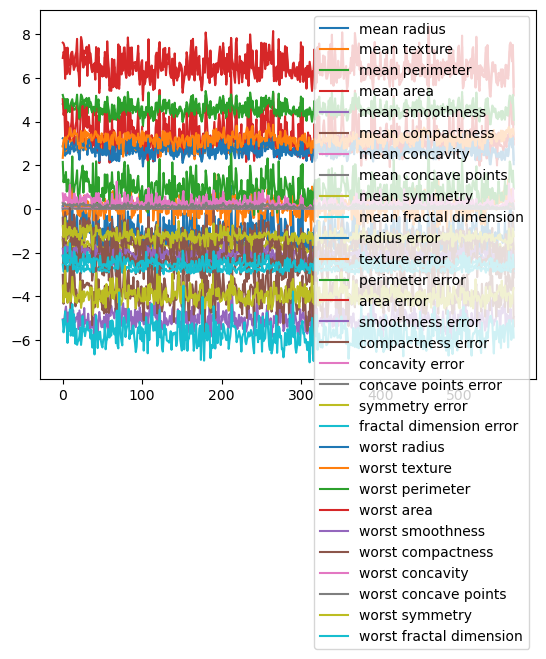

In [9]:
import matplotlib.pyplot as plt
for i in cancer_df:
    if all(cancer_df[i]>0):
        cancer_df[i]=np.log(cancer_df[i])

_ = cancer_df.plot()

In [11]:
# Randomly split into 50% training data and 50% testing data
# Why?
np.random.seed(130)
training_indices = cancer_df.sample(frac=0.5, replace=False).index.sort_values()
testing_indices = cancer_df.index[~cancer_df.index.isin(training_indices)]

In [19]:
# Recall the binary 'target' 
# But notice here the outcome variable is continuous (not binary) 
# (and same for the predictor variables, binary 'target' not used)
linear_spec_4 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) + scale(Q('smoothness error'))
                      + scale(Q('mean fractal dimension')) + scale(Q('mean smoothness'))
                      + scale(Q('mean symmetry')) * scale(Q('area error'))
                      * scale(Q('worst texture'))
                      * scale(Q('worst smoothness'))
                      * scale(Q('worst symmetry'))
                      * scale(Q('worst concave points'))
                      * scale(Q('worst compactness'))
                      * scale(Q('worst concavity'))
'''

linear_spec_3 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) * scale(Q('smoothness error'))
                      * scale(Q('mean fractal dimension')) * scale(Q('mean smoothness'))
                      * scale(Q('mean symmetry')) 
'''

linear_spec_2 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) + scale(Q('smoothness error'))
                      + scale(Q('mean fractal dimension')) + scale(Q('mean smoothness'))
                      + scale(Q('mean symmetry')) 
'''
linear_spec_1 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) + scale(Q('smoothness error'))
'''
MLR = smf.ols(linear_spec_3, data=cancer_df.loc[training_indices,:])
MLR_fit = MLR.fit() # Fit the mulitple lienar regression model (MLR)

In [15]:
# "In sample" performance based on the "training data"
np.corrcoef(MLR_fit.predict(cancer_df.loc[training_indices,:]),
            cancer_df.loc[training_indices,"mean area"])[0,1]**2

0.5009341106158756

In [17]:
# "Out of sample" performance based on the "testing data"
# Why?
np.corrcoef(MLR_fit.predict(cancer_df.loc[testing_indices,:]),
            cancer_df.loc[testing_indices,"mean area"])[0,1]**2

0.3428936615687025

Linear model provides line of best fit for the the dataset. When the model is used on a different dataset you can expect to not be the same. 



In [23]:
MLR = smf.ols(linear_spec_2, data=cancer_df.loc[training_indices,:])
MLR_fit = MLR.fit() # Fit the mulitple lienar regression model (MLR)

print(np.corrcoef(MLR_fit.predict(cancer_df.loc[training_indices,:]),
            cancer_df.loc[training_indices,"mean area"])[0,1]**2)

print(np.corrcoef(MLR_fit.predict(cancer_df.loc[testing_indices,:]),
            cancer_df.loc[testing_indices,"mean area"])[0,1]**2)

0.4228088270343344
0.37726150415690907


In [25]:
MLR = smf.ols(linear_spec_3, data=cancer_df.loc[training_indices,:])
MLR_fit = MLR.fit() # Fit the mulitple lienar regression model (MLR)

print(np.corrcoef(MLR_fit.predict(cancer_df.loc[training_indices,:]),
            cancer_df.loc[training_indices,"mean area"])[0,1]**2)

print(np.corrcoef(MLR_fit.predict(cancer_df.loc[testing_indices,:]),
            cancer_df.loc[testing_indices,"mean area"])[0,1]**2)

0.5009341106158756
0.3428936615687025


In [27]:
MLR = smf.ols(linear_spec_4, data=cancer_df.loc[training_indices,:])
MLR_fit = MLR.fit() # Fit the mulitple lienar regression model (MLR)

print(np.corrcoef(MLR_fit.predict(cancer_df.loc[training_indices,:]),
            cancer_df.loc[training_indices,"mean area"])[0,1]**2)

print(np.corrcoef(MLR_fit.predict(cancer_df.loc[testing_indices,:]),
            cancer_df.loc[testing_indices,"mean area"])[0,1]**2)

0.9933105602485334
0.04770632715971255


spec_4 is an example of over fitting. On the data it fits really well. But for new data it is really bad.

Training dataset tends to have better fit with the model than the testing dataset. 

Having a more comprehensive model over a more complex model can be better. 

Expanding your model to big can be over fitting. 

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Specify outcome and "Design Matrix"
# y ~ col1 + col2 + ... + colk
clf.fit(X=cancer_df.iloc[training_indices, :], 
        y=cancer_data.target[training_indices])
# The outcome has changed compared to the earlier multiple linear regression model...

DecisionTreeClassifier(max_depth=2, random_state=42)

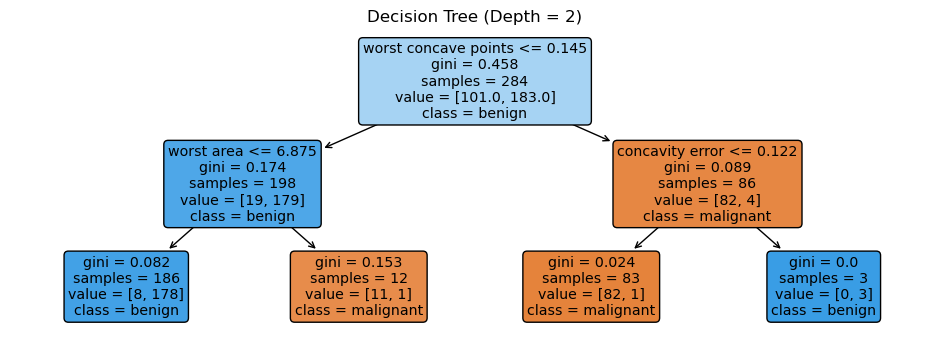

In [32]:
# Details regarding code are not the point and will be discused and explore later in LEC

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plot_tree(clf, feature_names=cancer_data.feature_names.tolist(), 
          class_names=cancer_data.target_names.tolist(), 
          filled=True, rounded=True)
plt.title("Decision Tree (Depth = 2)")
plt.show()

A set of criteria you would generally follow to make a decision.

Trying to make a decision if a tumour is maglignant of benine.

If a tumour is beyond a threshold it is likely to be malginant. 

Then it goes to another branch, if it was beyond the first threshold and the next, then it is even more likely to be malignant. 

Similar to multi linear regression. predicting an outcome. but looking at each variable and deciding at which range of data are you going to get a different outcome and taking into consideration all different variables that you have. 

As you move down the branches, the number of samples is decreasing, so the model fits the data worse and worse as you move down the tree.

Not a perfect way to determine if a tumour is benign or malignant. But it is giving you what it thinks based on what you've told it. 

4 outcomes. 
maglignant -> right it is malignant 
malignant -> wrong, it is not malignant 
Benign -> right,
Benign -> wrong. 

In [44]:
# Make Benign 0 and Malignant 1
# JUST RUN THIS ONCE!!
cancer_data.target = 1-cancer_data.target 
cancer_data.target_names = np.array(['Benign\n(negative)','Malignant\n(positive)'])

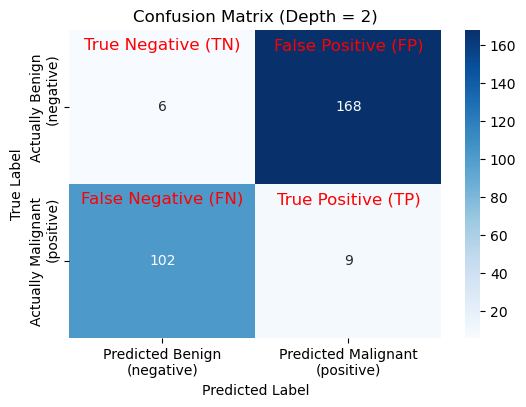

In [46]:
# Details regarding code are not the point and will be discused and explored later in LEC

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred_depth_2 = clf.predict(cancer_df.iloc[testing_indices, :])

# Generate the confusion matrix
conf_matrix = confusion_matrix(cancer_data.target[testing_indices], y_pred_depth_2)

# Get the target names for 'benign' and 'malignant'
target_names = cancer_data.target_names.tolist()

# Set up a confusion matrix with proper labels using target names
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Predicted {label}' for label in target_names], 
            yticklabels=[f'Actually {label}' for label in target_names])

plt.title('Confusion Matrix (Depth = 2)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add custom labels for FP, FN, TP, and TN
plt.text(0.5, 0.1, "True Negative (TN)", fontsize=12, color='red', ha='center', va='center')
plt.text(1.5, 0.1, "False Positive (FP)", fontsize=12, color='red', ha='center', va='center')
plt.text(0.5, 1.1, "False Negative (FN)", fontsize=12, color='red', ha='center', va='center')
plt.text(1.5, 1.1, "True Positive (TP)", fontsize=12, color='red', ha='center', va='center')

plt.show()

False positive: test saying positive but it is negative.
False negative: test saying it is negative but it is positive.
True Positive: Test saying it malignant and its true 
True Negative: Test is saying its malignant and its False.

Sensitivity 
Specificity
- These test how good your model it.

Confusion matrix tells us this model is not doing a good job at predicting if a tumour is malignant or benign. 


Outcome for Multi Linear Regression


Outcome for classification 
Benign / MAlignant


Hypothesis is predicting an outcome and the outcome is incorrect are errors. 

Communication Activity. 
1. 
Type 1 error: Saying the tumour is cancerous but it is not cancerous.
Type 2 error: saying the tyumour is not cancerours but it is cancerous.
